# Raport z laboratorium 6
## Kacper Bugała, 303739

### 1. Opis rozwiązania
<p>Zadaniem była implementacja algorytmu Q-Learningu. Stworzony agent został następnie wykorzystany w rozwiązywaniu problemu Taxi dostępnego w paczce <em>gymnasium</em>. Środowisko zadania Taxi to plansza 5x5, po której porusza się 'taksówkarz' w celu odebrania 'pasażera' i odwiezienia go do pola docelowego. Cztery skrajne pola planszy to punkty odbioru lub celu pasażera. Przy inicjalizacji środowiska generowany jest stan, w którym pasażer znajduje się w losowym punkcie zbiórki (z 4 dostępnych) i losowym celem podróży (losowym z pozostałych 3). Taksówkarz pojawia się w losowym polu. Agent w każdym kroku wybiera akcję, spośród 6 możliwych: ruch w wybranym kierunku świata o jedno pole (ruch na ukos jest niemożliwy), odebrania i wysadzenie pasażera. Każdy kolejny krok (oprócz akcji kończącej zadanie, czyli wysadzenia pasażera w odpowiednim miejscu) przynosi stałą karę (<strong>-1</strong>), dodatkowo wysoko karana (<strong>-10</strong>) jest próba wysadzenia lub odebrania pasażera w sytuacji, gdy jest to niemożliwe (wysadzenie w miejscu innym niż docelowe, odebranie pasażera którego nie ma na danym polu planszy). Nagrodę (<strong>+20</strong>) przynosi odwiezienie pasażera do punktu docelowego.</p> 
<p>Jakość algorytmu Q-Learningu w dużej mierze zależy od doboru hiperparametrów:</br>
<ol>
    <li><strong>alpha</strong> - odpowiada za 'szybkość' uczenia, wpływa na wielkość zmian wprowadzanych na elementach tablicy Q (<em>learning rate</em>)</li>
    <li><strong>gamma</strong> - odpowiada za waloryzacje przyszłych nagród, przyszłe nagrody powinne być mniej warte niż najbliższe (<em>discounting factor</em>)</li>
    <li><strong>epsilon</strong> - współczynnik dotyczący eksploracji algorytmu, szansa na losową eksploracje (wybór losowej akcji), zamiast najlepszego wyboru zgodnie z tablicą Q</li>
</ol>
</p>
<p>W wyniku testów wybrano najlepszy zestaw wartości tych parametrów. Wybrano <em>alpha</em>=0.15, <em>gamma</em>=0.7, oraz <em>epsilon</em>=0.1. Oczekiwanym rezultatem testów jest zwiększanie jakości rozwiązania zadania względem podejmowania losowych decyzji (pod kątem zwiększenia sumy nagród, oraz minimalizacji liczby kroków i wykonaniu nielegalnych akcji).
</p>


### 2. Przeprowadzone eksperymenty
<p>Wszystkie eksperyemnty ewaluacji przeprowadzone zostały na 100 różnych episodach.</p>
<p>Badane są wskaźniki: 
<ol>
    <li><strong>av_score</strong> - średnia suma nagród w pojedynczym epizodzie</li>
    <li><strong>av_steps</strong> - średnia liczba kroków (podjętych akcji)</li>
    <li><strong>av_illegal_moves</strong> - średnia liczba wykonanych nielegalnych akcji (niepoprawne wysadzenie, odebranie pasażera)</li>
    <li><strong>solved_ratio</strong> - wskaźnik dotyczący tylko periodycznej ewaluacji uczenia tablicy Q. Dla 'za mało' nauczonego agenta, często zdarza się, że podczas rozwiązywania problemu algorytm 'utknie' i będzie wykonywać cały czas tę samą decyzję, która nie prowadzi do rozwiązania zadania. Wynika to z wybierania zawsze największej wartości z tablicy Q dla danego stanu, który został nauczony przez za mało iteracj. Wprowadzono <em>breakpoint</em>, czyli algorytm 'ucina' swoje działanie w n-tym kroku i uznaje zadanie za rozwiązanie. Wybrano maksymalną liczbę kroków na <strong>500</strong></li>
</ol>
<p>Najpierw sprawdzono wyniki algorytmu dla podejmowania losowych decyzji wyboru akcji.</p>

In [1]:
import gymnasium as gym
import numpy as np
import sys
sys.path.append("../src")
from solver import Solver
from matplotlib import pyplot as plt

env = gym.make('Taxi-v3').env
agent = Solver(alpha=0.15, gamma=0.75, epsilon=0.12)
agent.load_env(env)


In [3]:
episodes_count = 100

agent.evaluate_random(episodes_count=episodes_count)

Calculating for random actions


c:\Python310\lib\site-packages\gymnasium\utils\passive_env_checker.py:249: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Evaluation point:
av_score = -9623.05, av_steps = 2463.67, av_illegal_moves = 797.82


<p>Wyniki pokazują, że liczba kroków niezbędna do rozwiązania problemu w sposób losowy liczona jest w tysiącach, a liczba nielegalnych kroków zgodnie (zgodnie z oczekiwaniami) wynosi około jedną trzecią wszystkich wykonanych ruchów (we wszystkich, oprócz dwóch sytuacji, wybranie akcji 'odbierz' i 'wysadź' pasażera będzie niepoprawne). Wszystko to wpływa także na bardzo niską wartość sumy nagród (<em>score</em>).</p>

<p>Następnie zaczęto nauczać agenta. Wartość współczynnika <em>breakpoint_ev</em> ustalono na 500 i tyle wynosi maksymalna liczba kroków rozwiązywania bez eksploracji.

In [4]:
breakpoint_ev = 500
ev_points, av_scores, av_steps, av_illegal_moves, av_solved = agent.evaluate(50, 50000, episodes_count, breakpoint_ev)

Learning iterations per ev point: 1000
Stop points: [ 1000  2000  3000  4000  5000  6000  7000  8000  9000 10000 11000 12000
 13000 14000 15000 16000 17000 18000 19000 20000 21000 22000 23000 24000
 25000 26000 27000 28000 29000 30000 31000 32000 33000 34000 35000 36000
 37000 38000 39000 40000 41000 42000 43000 44000 45000 46000 47000 48000
 49000 50000]
Episodes per evaluation point: 100
Calculating for random actions
Evaluation point:
av_score = -1764.79, av_steps = 452.17, av_illegal_moves = 146.36, solved_ratio = 0.21999999999999997

Training data (iters 0 - 999)
-----------------
Calculating average at evaluation stop: 0
Evaluation point:
av_score = -275.95, av_steps = 285.19, av_illegal_moves = 0.0, solved_ratio = 0.43999999999999995

Training data (iters 1000 - 1999)
-----------------
Calculating average at evaluation stop: 1
Evaluation point:
av_score = -88.04, av_steps = 105.05, av_illegal_moves = 0.0, solved_ratio = 0.81

Training data (iters 2000 - 2999)
-----------------
C

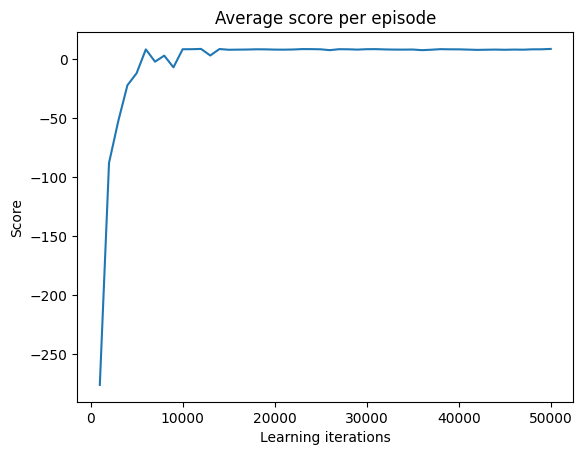

In [5]:
plt.plot(ev_points, av_scores)
plt.title('Average score per episode')
plt.ylabel('Score')
plt.xlabel('Learning iterations')
plt.show()

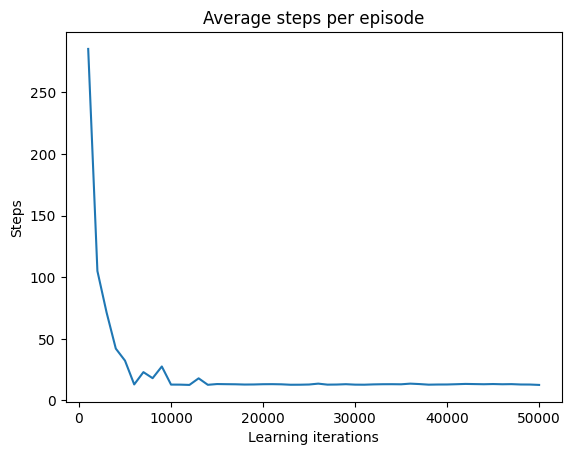

In [6]:
plt.plot(ev_points, av_steps)
plt.title('Average steps per episode')
plt.ylabel('Steps')
plt.xlabel('Learning iterations')
plt.show()

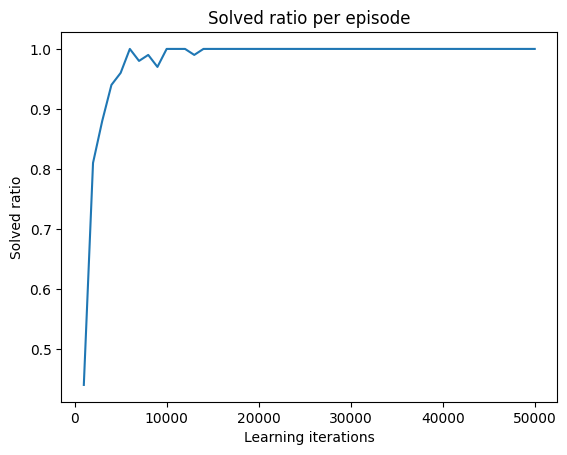

In [7]:
plt.plot(ev_points, av_solved)
plt.title('Solved ratio per episode')
plt.ylabel('Solved ratio')
plt.xlabel('Learning iterations')
plt.show()

Ewaluacja pokazuje wysoką jakość zaimplementowanego algorytmu. Już po 20.000 epokach uczenia agent jest w stanie rozwiązać każdą planszę. W pierwszych 10.000 epok bardzo dobrze widać szybko wzrost jakości (w szczególności względem podejmowania decyzji losowych). Po zakończeniu treningu, agent rozwiązuje problem średnio w około 13 ruchów. Patrząc na planszę, dwa najbardziej oddalone pola to narożniki kwadratu, oddalone od siebie o 10 ruchów. Dodając do tego ruch odebrania i wypuszczenia pasażera z taksówki, w najgorszym przypadku zadanie da się rozwiązać w 10+10+2=22 ruchy. Badanie jakości na aż 100 losowych epizodach pozwala stwierdzić, że agent nauczony został możliwie najlepiej. średnia 13 ruchów można uznać za wartość oczekiwaną najlepszego rozwiązania. Zmiana wartości hiperparametrów wpływa na szybkość znalezienia optimum wartości w tablicy Q, oraz szumy w monotoniczności jakości nauczania po kolejnych epokach. Ponieżej przedstawiono inne przykłady nastaw hiperparametrów.

### 3. Wnioski

Learning iterations per ev point: 1000
Stop points: [ 1000  2000  3000  4000  5000  6000  7000  8000  9000 10000 11000 12000
 13000 14000 15000 16000 17000 18000 19000 20000 21000 22000 23000 24000
 25000 26000 27000 28000 29000 30000 31000 32000 33000 34000 35000 36000
 37000 38000 39000 40000 41000 42000 43000 44000 45000 46000 47000 48000
 49000 50000]
Episodes per evaluation point: 100
Calculating for random actions
Evaluation point:
av_score = -1827.09, av_steps = 466.68, av_illegal_moves = 151.46, solved_ratio = 0.13

Training data (iters 0 - 999)
-----------------
Calculating average at evaluation stop: 0
Evaluation point:
av_score = -372.44, av_steps = 377.69, av_illegal_moves = 0.0, solved_ratio = 0.25

Training data (iters 1000 - 1999)
-----------------
Calculating average at evaluation stop: 1
Evaluation point:
av_score = -316.51, av_steps = 324.07, av_illegal_moves = 0.0, solved_ratio = 0.36

Training data (iters 2000 - 2999)
-----------------
Calculating average at evaluat

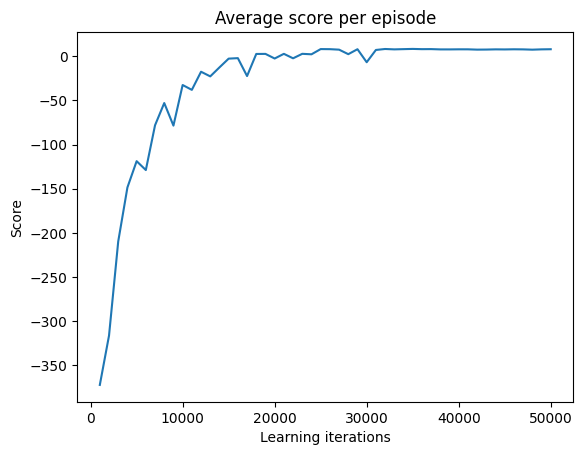

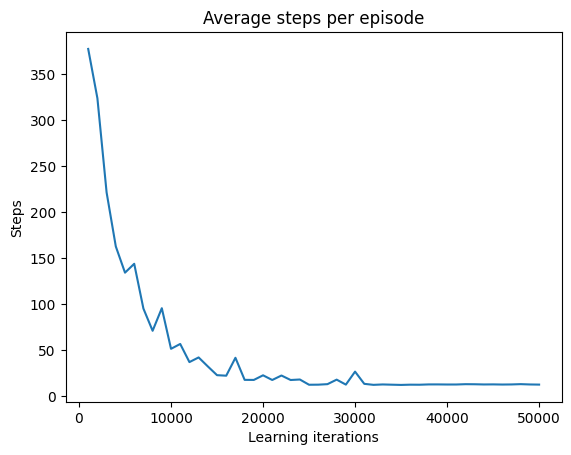

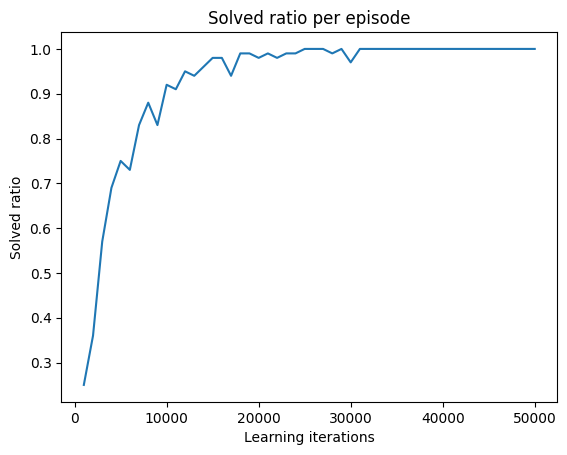

In [8]:
agent_test = Solver(alpha=0.1, gamma=0.6, epsilon=0.1)

agent_test.load_env(env)

episodes_count = 100
breakpoint_ev = 500
ev_points, av_scores, av_steps, av_illegal_moves, av_solved = agent_test.evaluate(50, 50000, episodes_count, breakpoint_ev)
plt.plot(ev_points, av_scores)
plt.title('Average score per episode')
plt.ylabel('Score')
plt.xlabel('Learning iterations')
plt.show()
plt.plot(ev_points, av_steps)
plt.title('Average steps per episode')
plt.ylabel('Steps')
plt.xlabel('Learning iterations')
plt.show()
plt.plot(ev_points, av_solved)
plt.title('Solved ratio per episode')
plt.ylabel('Solved ratio')
plt.xlabel('Learning iterations')
plt.show()

Learning iterations per ev point: 1000
Stop points: [ 1000  2000  3000  4000  5000  6000  7000  8000  9000 10000 11000 12000
 13000 14000 15000 16000 17000 18000 19000 20000 21000 22000 23000 24000
 25000 26000 27000 28000 29000 30000 31000 32000 33000 34000 35000 36000
 37000 38000 39000 40000 41000 42000 43000 44000 45000 46000 47000 48000
 49000 50000]
Episodes per evaluation point: 100
Calculating for random actions
Evaluation point:
av_score = -1844.61, av_steps = 475.05, av_illegal_moves = 152.43, solved_ratio = 0.10999999999999999

Training data (iters 0 - 999)
-----------------
Calculating average at evaluation stop: 0
Evaluation point:
av_score = -87.89, av_steps = 104.9, av_illegal_moves = 0.0, solved_ratio = 0.81

Training data (iters 1000 - 1999)
-----------------
Calculating average at evaluation stop: 1
Evaluation point:
av_score = -22.58, av_steps = 42.32, av_illegal_moves = 0.0, solved_ratio = 0.94

Training data (iters 2000 - 2999)
-----------------
Calculating average

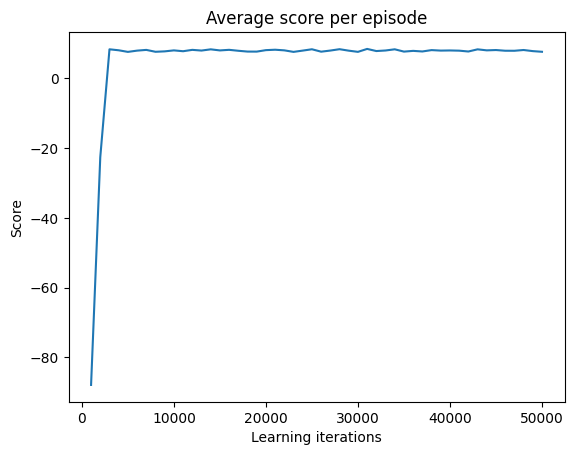

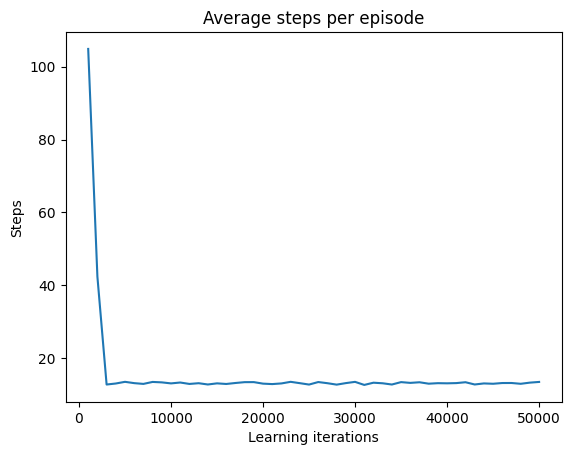

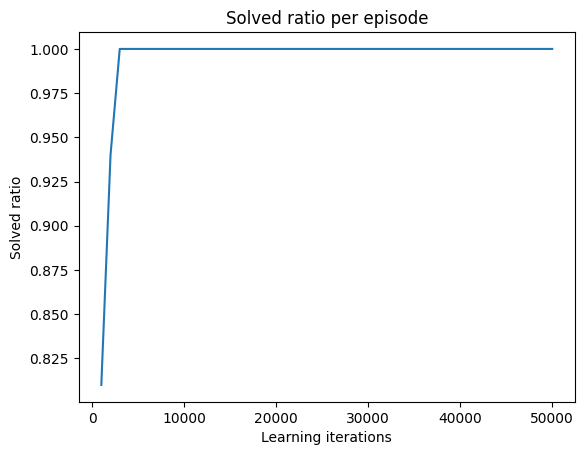

In [9]:
agent_test2 = Solver(alpha=0.2, gamma=0.85, epsilon=0.05)

agent_test2.load_env(env)

episodes_count = 100
breakpoint_ev = 500
ev_points, av_scores, av_steps, av_illegal_moves, av_solved = agent_test2.evaluate(50, 50000, episodes_count, breakpoint_ev)
plt.plot(ev_points, av_scores)
plt.title('Average score per episode')
plt.ylabel('Score')
plt.xlabel('Learning iterations')
plt.show()
plt.plot(ev_points, av_steps)
plt.title('Average steps per episode')
plt.ylabel('Steps')
plt.xlabel('Learning iterations')
plt.show()
plt.plot(ev_points, av_solved)
plt.title('Solved ratio per episode')
plt.ylabel('Solved ratio')
plt.xlabel('Learning iterations')
plt.show()

Mimo różnych wartości hiperparametrów, każdy z agentów zdołał w dostatecznie dużej liczbie iteracji osiągnąć zadowalającą jakość. Pokazuje to, że algorytm został zaimplementowany jak najbardziej poprawnie. Każdy agent osiąnął 100% skuteczność w rozwiązywaniu problemów, a tablice Q zostały wypełnione optymalnymi wartościami

Poprawnie 'nauczony' algorytm Q-Learningu jest bardzo skuteczną metoda uczenia ze wzmocnieniem. Jego wadą jest ograniczenie do rozwiązywania prostych, z góry opisanych zadań deterministycznych. Nie można go używać do nowych zadań, a pełne wyuczenie agenta jest bardzo czasochłonne.   